In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Sklearn for Logistic Regression

The field of healthcare is being revolutionised by Machine Learning. For certain diseases, models can be trained using data from previous patients to identify whether a new patient has the disease or not. Often the performance of these diagnostic models exceeds the human experts.


<img src="../images/doctor.png" style="display: block;margin-left: auto;margin-right: auto;height: 400px"/>

In this notebook you will use Scikit-Learn to perform Logistic Regression on a medical dataset.

We will use one of the datasets built into Scikit-Learn for practise purposes: [The Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset).

In [2]:
import pandas as pd
medical_df = pd.read_csv('../data/medical.csv')

### Exercise: 

Perform some preliminary analysis on the dataset.

* How many patients is there data for?
* What datatypes does the dataset contain? Are there any missing values?
* How many predictive features are there? Will all the features be informative for the target?
* Which features do you think will be highly correlated. Investigate whether this is indeed the case.


In [3]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
medical_df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


## Assignment

Create Predictor variables 'X' and Target Variable 'y'

In [5]:
X = medical_df.drop('class', axis='columns')
y = medical_df['class']

## 1. Split the data into a training set and a testing set.

We will train our model on the training set and then use the test set to evaluate the model.

Reserve 20% of the data for testing and a random seed of 0.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 2. Importing the model

Look up how to import a simple [linear regression](https://scikit-learn.org/stable/modules/linear_model.html)

Import the model and then instantiate it.

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lr = LogisticRegression()

## 3. Training the model

Fit the model to the train set.

In [9]:
lr.fit(X_train,y_train)

/Users/lucysheppard/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The model may not converge in the deafult number of iterations (100). Update the `max_iter` parameter (using `.set_params`) such that the model coverges.

In [10]:
lr.set_params(max_iter=10000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

## 4. Investigate the model's coefficients.

To do this you can use the code below (You'll have to swap `lr` for the name of your model)

In [11]:
#Coefficients
coeff_df = pd.DataFrame(lr.coef_.reshape(30,1),X.columns,columns=['Coefficient'])
print(coeff_df)

                         Coefficient
mean radius                 0.684487
mean texture                0.190854
mean perimeter             -0.188933
mean area                   0.022919
mean smoothness            -0.151961
mean compactness           -0.183867
mean concavity             -0.370002
mean concave points        -0.219403
mean symmetry              -0.283252
mean fractal dimension     -0.028485
radius error               -0.049902
texture error               1.050628
perimeter error            -0.039495
area error                 -0.106113
smoothness error           -0.012877
compactness error           0.067148
concavity error            -0.004009
concave points error       -0.023055
symmetry error             -0.027568
fractal dimension error     0.016588
worst radius                0.234526
worst texture              -0.415287
worst perimeter            -0.196083
worst area                 -0.010839
worst smoothness           -0.271092
worst compactness          -0.652047
w

In [12]:
lr.coef_

array([[ 0.68448688,  0.19085356, -0.18893318,  0.02291889, -0.15196129,
        -0.18386739, -0.37000223, -0.21940269, -0.28325194, -0.0284851 ,
        -0.04990194,  1.05062771, -0.03949493, -0.10611253, -0.01287685,
         0.067148  , -0.00400867, -0.02305549, -0.0275681 ,  0.01658769,
         0.23452623, -0.41528676, -0.19608309, -0.0108386 , -0.27109247,
        -0.65204717, -1.21963529, -0.47466597, -0.63842554, -0.09271899]])

### Interpreting the model

a) What do the coefficients represent?

b) Are the coefficients comparable?

## 5. Model Predictions

Use your model to make prediction on the test set.



In [13]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [14]:
lr.predict_proba(X_test)

array([[9.93989434e-01, 6.01056563e-03],
       [3.14931182e-02, 9.68506882e-01],
       [1.39446651e-03, 9.98605533e-01],
       [1.44395912e-01, 8.55604088e-01],
       [3.21245365e-05, 9.99967875e-01],
       [6.42974902e-04, 9.99357025e-01],
       [2.74885407e-03, 9.97251146e-01],
       [5.30808569e-04, 9.99469191e-01],
       [8.33873006e-05, 9.99916613e-01],
       [1.44648947e-05, 9.99985535e-01],
       [7.02703322e-01, 2.97296678e-01],
       [1.92976303e-01, 8.07023697e-01],
       [7.73917858e-05, 9.99922608e-01],
       [7.40091083e-01, 2.59908917e-01],
       [3.21844879e-01, 6.78155121e-01],
       [9.90271280e-01, 9.72872020e-03],
       [4.19974590e-04, 9.99580025e-01],
       [9.99999807e-01, 1.93032726e-07],
       [9.95846198e-01, 4.15380174e-03],
       [1.00000000e+00, 4.70877443e-10],
       [9.99898090e-01, 1.01910264e-04],
       [9.63944813e-01, 3.60551874e-02],
       [2.06272663e-03, 9.97937273e-01],
       [3.80014242e-03, 9.96199858e-01],
       [8.699206

## 6. Evaluating Predictions

a) print the accuracy of the model

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9473684210526315

b) print the classification report

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        47
           1       0.98      0.93      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



c) Plot the non-normalized and normalized confusion matrix.

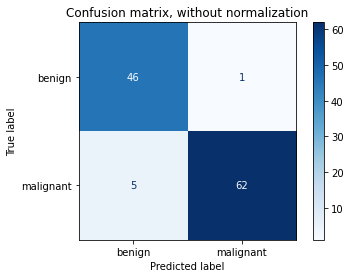

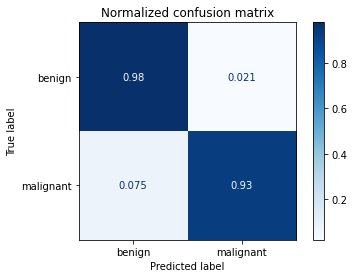

In [17]:
from sklearn.metrics import plot_confusion_matrix

labels = ['benign', 'malignant']

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

## 7. Interpretating the confusion matrix

Using the normalized confusion matrix, what is
- The true positive rate
- The true negative rate
- The false positive rate
- the false negative rate

In the context of diagnostic models, what is the most important rate to improve?

## Bonus

See if you can improve the hyper-paramters of your model, such that the rate you identified in the previous question improves.